In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

names = pd.read_csv('/content/drive/MyDrive/80Items_names/EN_Best_tokens_Weighted.csv')
names.head()

,Unnamed: 0,EN_Best,tokenized,TokenWeights
0,0,bottle_opener,"['bottle', '##open', '##er']","5,4,1"
1,1,pencil_sharpener,"['pencil', '##sha', '##rp', '##ener']","5,1,1,3"
2,2,stapler,"['staple', '##r']","9,1"
3,3,sewing_needle,"['sewing', '##nee', '##dle']","5,3,2"
4,4,pliers,"['pl', '##iers']","5,5"


In [ ]:
!pip3 uninstall numpy
!pip3 install numpy==1.14.6

In [ ]:
!pip3 install bert_embedding

In [ ]:
!pip3 install transformers

In [ ]:
!pip3 install torchvision 

In [8]:
import bert_embedding
from bert_embedding import BertEmbedding
bert_embedding=BertEmbedding()

Vocab file is not found. Downloading.


In [11]:
from transformers import BertModel, BertTokenizer
model_name = 'bert-base-uncased'

tokenizer = BertTokenizer.from_pretrained(model_name)
# load
model = BertModel.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity

weighted_DisBertLHS_best = np.empty([len(names['EN_Best']), len(names['EN_Best'])])

for i in range(len(names['EN_Best'])):
  for j in range(len(names['EN_Best'])): 
      obj1 = tokenizer.encode(names['EN_Best'][i].replace("_", ""), add_special_tokens=False)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0]
        
        weighted_embed1 =[]
        weight1 = list(map(int,names['TokenWeights'][i].split(',')))
        for k in range(len(weight1)):
            weighted_embed1.append(np.dot(lhs1[0][k],weight1[k]))
        
        first_word_embed = sum(weighted_embed1)/sum(weight1)


      obj2 = tokenizer.encode(names['EN_Best'][j].replace("_", ""), add_special_tokens=False)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] 

        weighted_embed2 = []
        weight2 = list(map(int,names['TokenWeights'][j].split(',')))
        for k in range(len(weight2)):
            weighted_embed2.append(np.dot(lhs2[0][k],weight2[k]))

        second_word_embed = sum(weighted_embed2)/sum(weight2)
        
      weighted_DisBertLHS_best[i, j] = 1 - cosine_similarity(first_word_embed.reshape(1, -1),second_word_embed.reshape(1, -1))


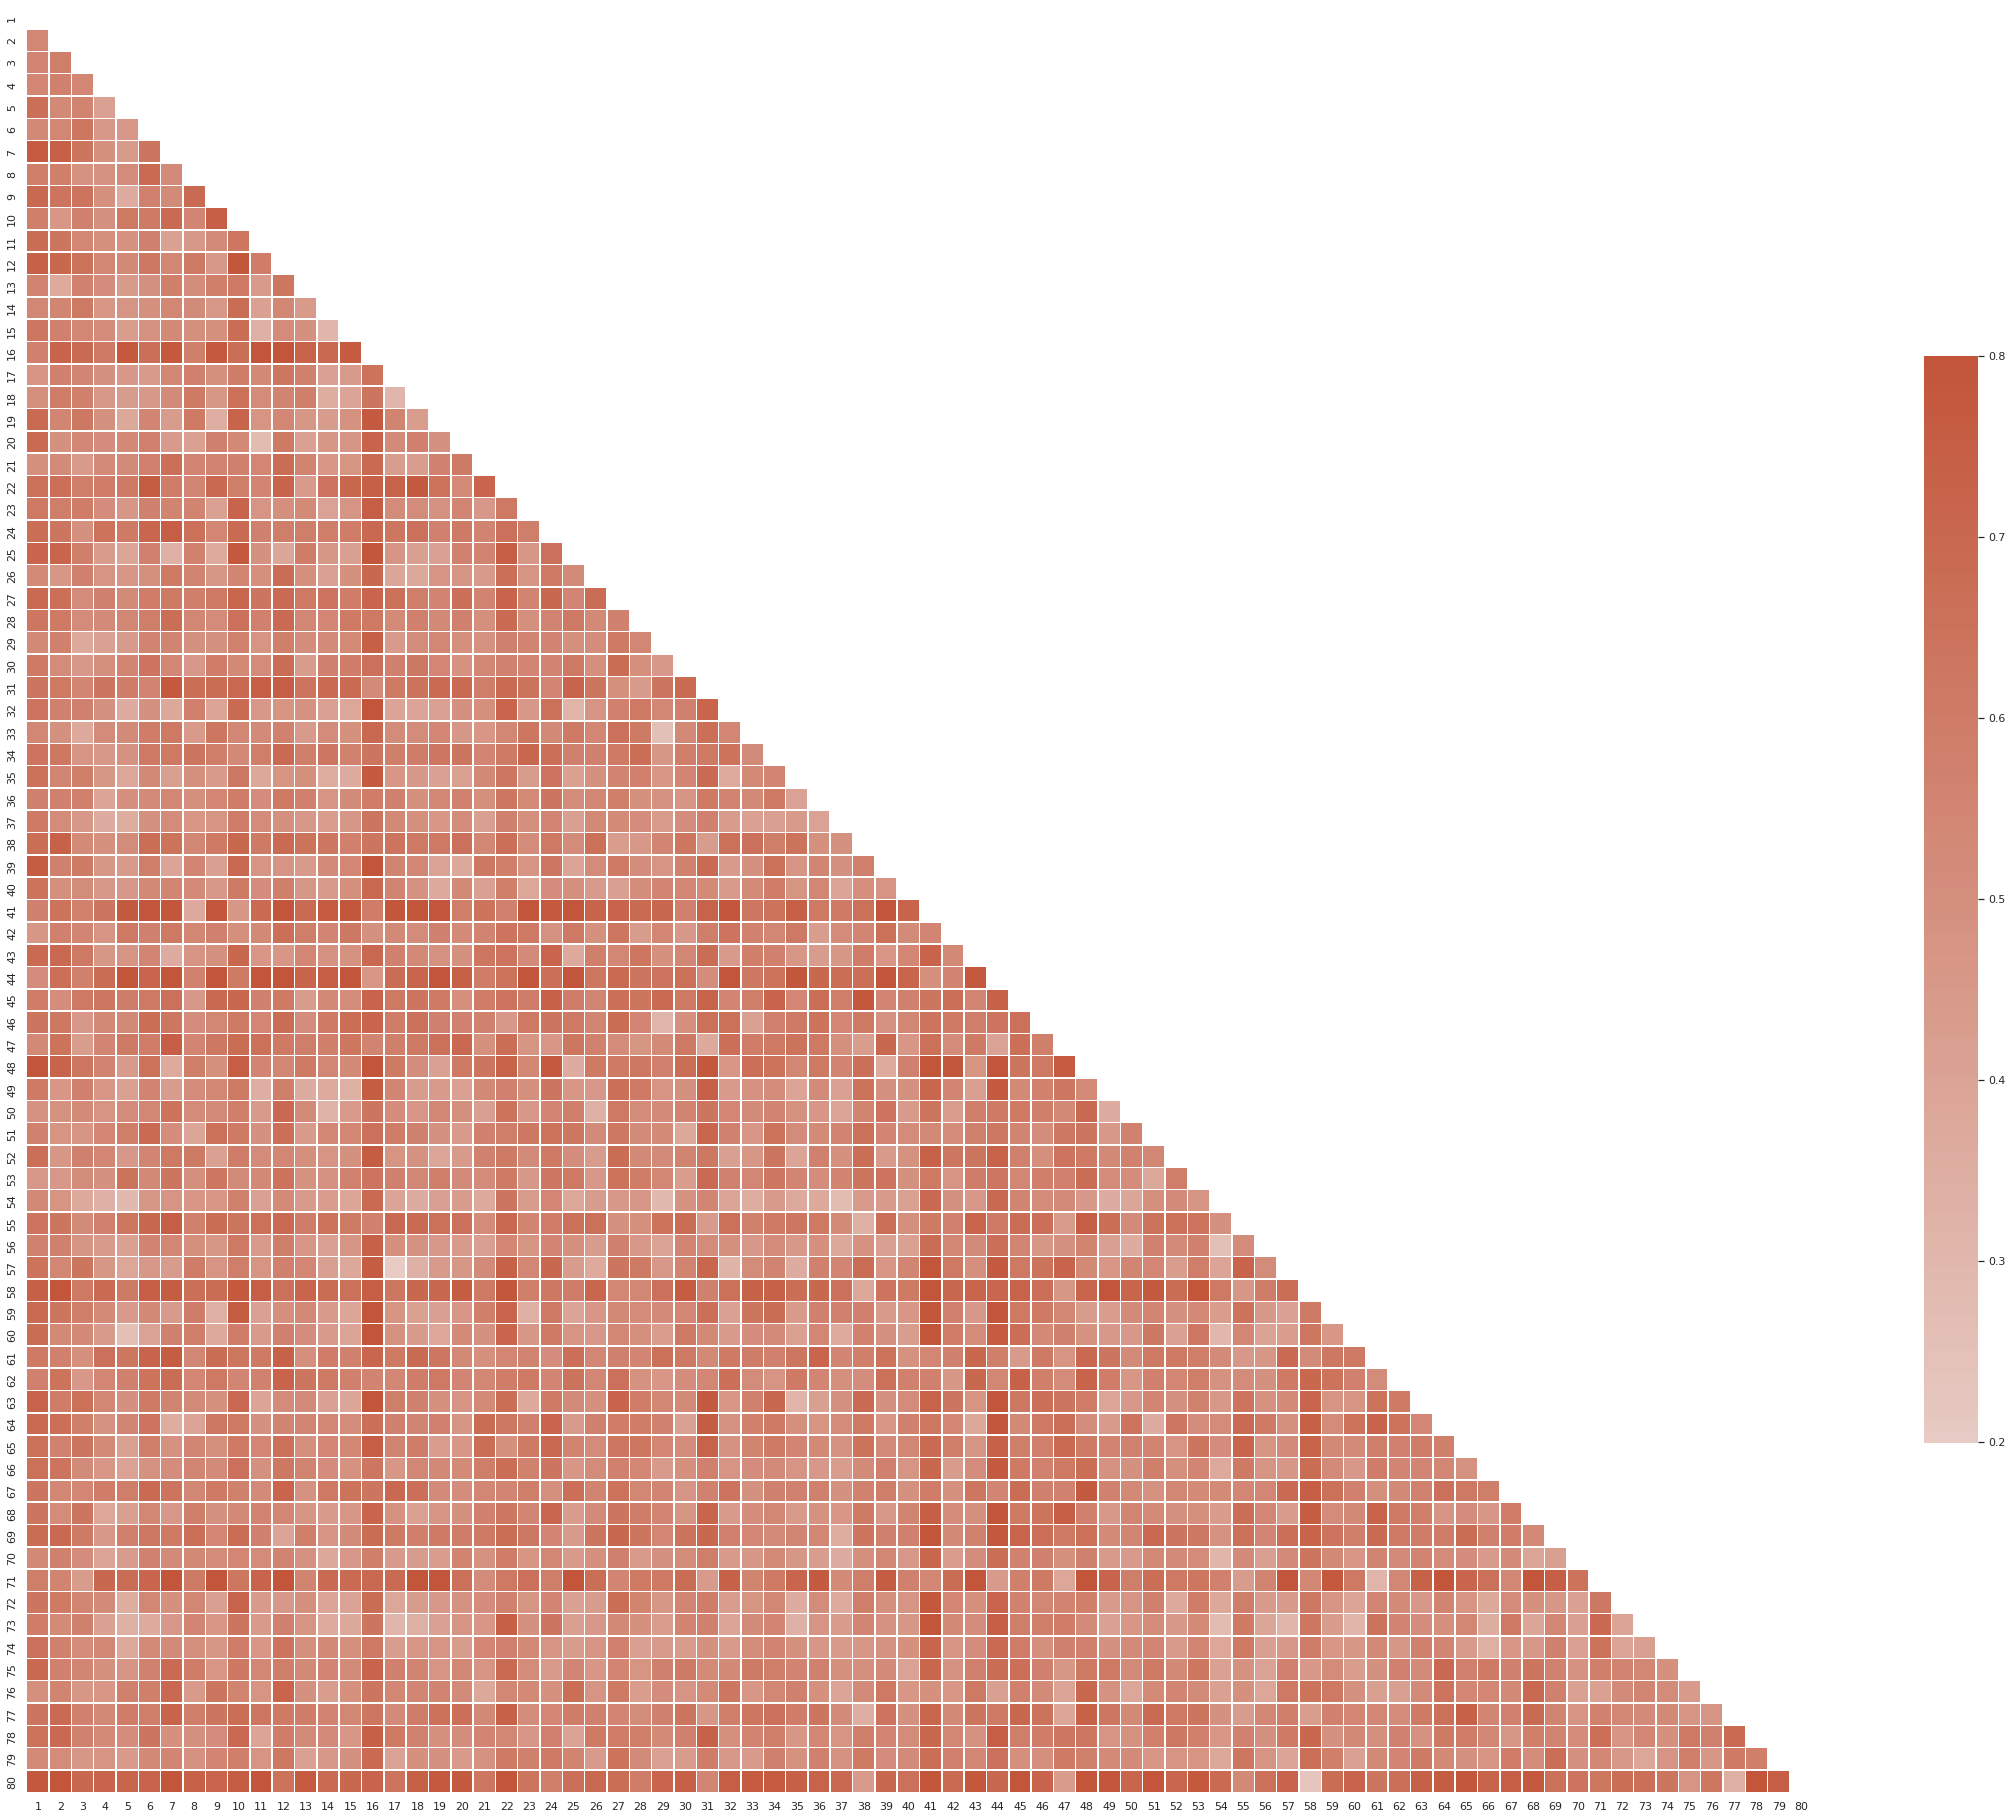

In [14]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

d = pd.DataFrame(data=weighted_DisBertLHS_best,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

# Save
d.to_csv('./weighted_DisBertLHS_best_RDM.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
weighted_DisBertLHS_best.shape

(80, 80)

In [16]:
# -----------------------------------------------------------

In [17]:
names = pd.read_csv('/content/drive/MyDrive/80Items_names/EN_Other_tokens_Weighted.csv')
names.head()

,Unnamed: 0,EN_Other,tokenized,TokenWeights
0,0,bottle_opener,"['bottle', '##open', '##er']","5,4,1"
1,1,pencil_sharpener,"['pencil', '##sha', '##rp', '##ener']","5,1,1,3"
2,2,stapler,"['staple', '##r']","9,1"
3,3,needle,['needle'],10
4,4,pliers,"['pl', '##iers']","5,5"


In [18]:
weighted_DisBertLHS_other = np.empty([len(names['EN_Other']), len(names['EN_Other'])])

for i in range(len(names['EN_Other'])):
  for j in range(len(names['EN_Other'])): 
      obj1 = tokenizer.encode(names['EN_Other'][i].replace("_", ""), add_special_tokens=False)
      obj1 = torch.tensor([obj1])
      with torch.no_grad():
        lhs1 = model(obj1)[0]
        
        weighted_embed1 =[]
        weight1 = list(map(int,names['TokenWeights'][i].split(',')))
        for k in range(len(weight1)):
            weighted_embed1.append(np.dot(lhs1[0][k],weight1[k]))
        
        first_word_embed = sum(weighted_embed1)/sum(weight1)


      obj2 = tokenizer.encode(names['EN_Other'][j].replace("_", ""), add_special_tokens=False)
      obj2 = torch.tensor([obj2])
      with torch.no_grad():
        lhs2 = model(obj2)[0] 

        weighted_embed2 = []
        weight2 = list(map(int,names['TokenWeights'][j].split(',')))
        for k in range(len(weight2)):
            weighted_embed2.append(np.dot(lhs2[0][k],weight2[k]))

        second_word_embed = sum(weighted_embed2)/sum(weight2)
        
      weighted_DisBertLHS_other[i, j] = 1 - cosine_similarity(first_word_embed.reshape(1, -1),second_word_embed.reshape(1, -1))


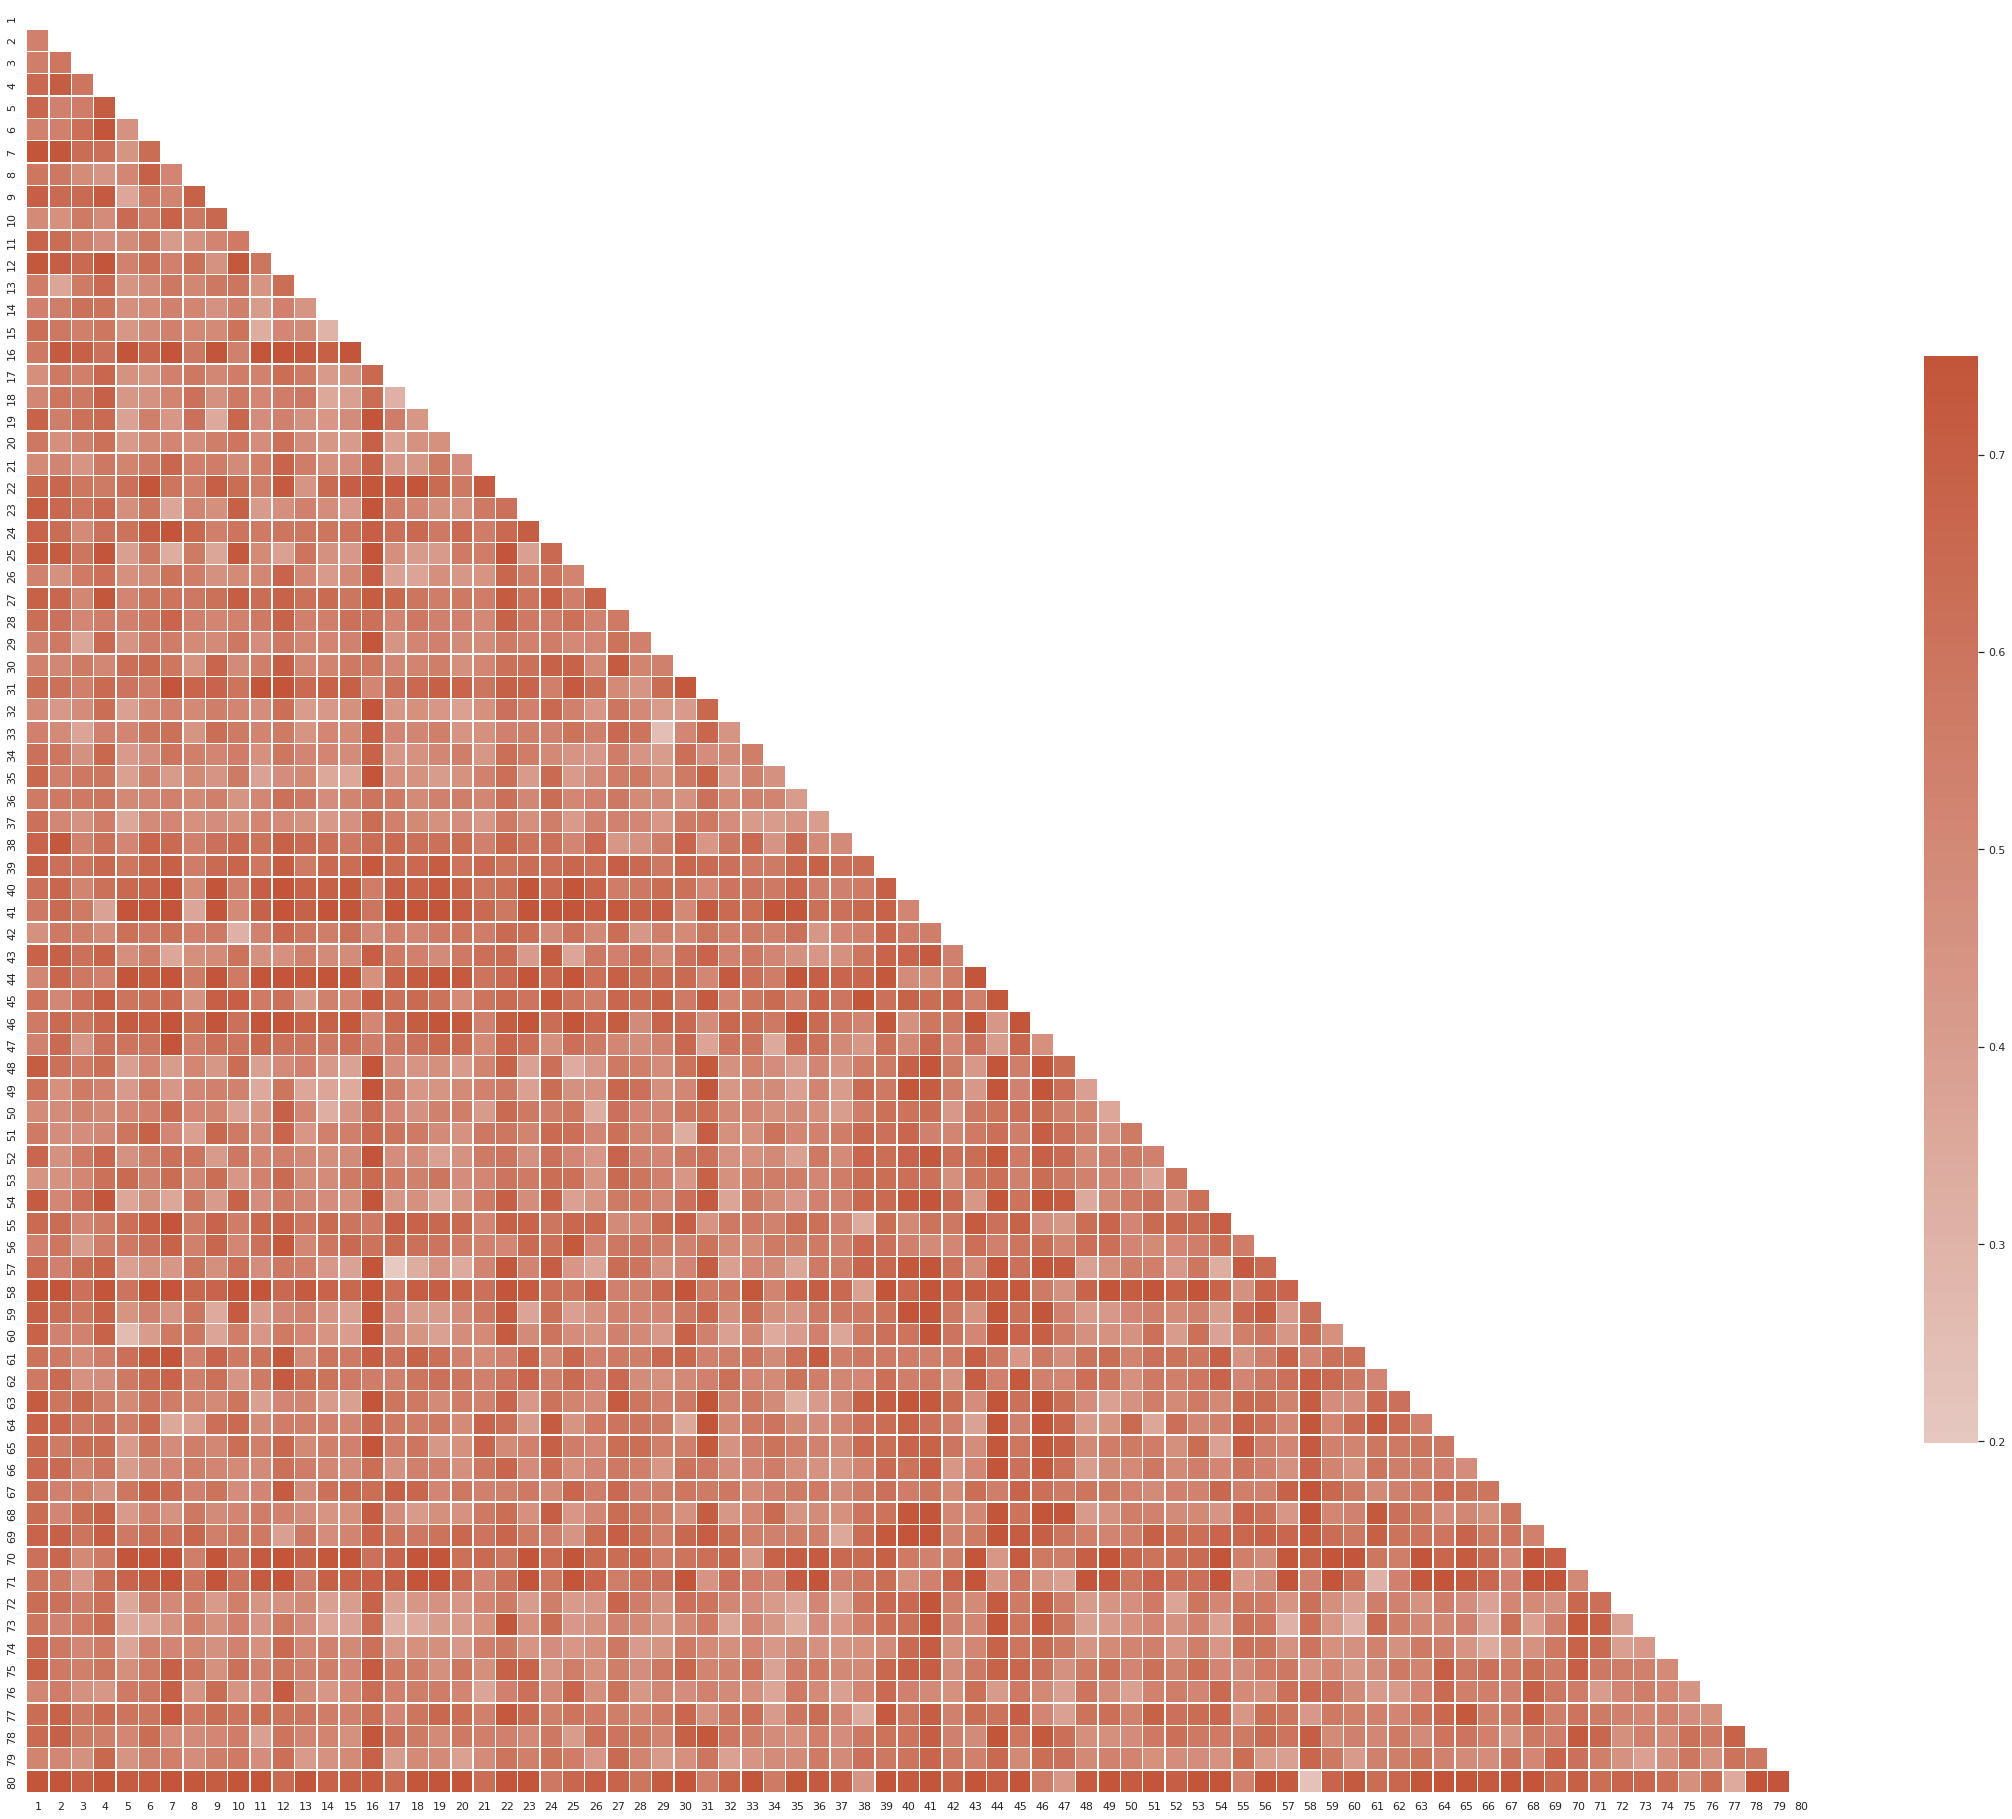

In [19]:
sns.set_theme(style="white")

d = pd.DataFrame(data=weighted_DisBertLHS_other,
                 index = list(range(1, 81)),
                 columns=list(range(1, 81)))

# Save
d.to_csv('./weighted_DisBertLHS_other_RDM.csv', index=False, header=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=0.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
weighted_DisBertLHS_other.shape

(80, 80)